## Exercise 5 - Regression

#### Importing the libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [29]:
AlbumData = pd.read_csv("Lab Album Sales.csv")

In [30]:
AlbumData

,totalsales,AdvertBudget,AirplayTimes,AttractivenessScore
0,344,24,56,23
1,130,996,38,17
2,368,1454,42,14
3,276,1194,38,12
4,226,580,49,10
...,...,...,...,...
195,196,916,31,12
196,242,892,16,8
197,252,804,36,8
198,238,1508,19,16


In [31]:
AlbumData.isna().sum()

totalsales             0
AdvertBudget           0
AirplayTimes           0
AttractivenessScore    0
dtype: int64

So no missing values, we can proceed

### Scatterplots

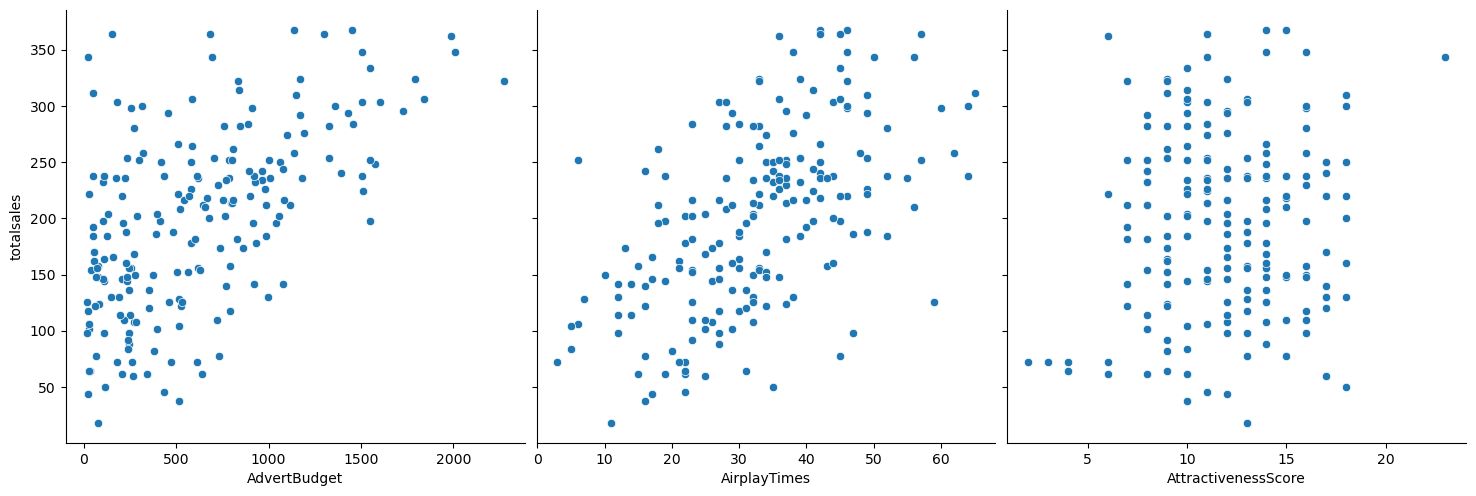

In [32]:
sns.pairplot(AlbumData, x_vars=['AdvertBudget', 'AirplayTimes', 'AttractivenessScore'], y_vars='totalsales', height=5, aspect=1, kind='scatter')
plt.show()

#### Linear Regression - Sales vs Advertising

In [33]:
X = AlbumData[['AdvertBudget']]
y = AlbumData['totalsales']

In [34]:
X = sm.add_constant(X)  # Adds intercept term
model = sm.OLS(y, X).fit()

In [35]:
# Extract F-statistic and P-value
f_statistic = model.fvalue
p_value = model.f_pvalue

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

F-statistic: 98.0442157766004
P-value: 4.946499173591371e-19


In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             totalsales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           4.95e-19
Time:                        16:59:43   Log-Likelihood:                -1120.8
No. Observations:                 200   AIC:                             2246.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          139.5931      7.589     18.395   

#### Extracting coefficients

In [37]:
intercept = model.params['const']
coefficient = model.params['AdvertBudget']

In [38]:
print(f'Intercept: {intercept}')
print(f'Coefficient (AdvertBudget): {coefficient}')

Intercept: 139.5931200780024
Coefficient (AdvertBudget): 0.09551716452262704


#### Predict sales for $135,000 advertising budget

In [39]:
advertising_budget = 135
predicted_sales = intercept + coefficient * advertising_budget

In [40]:
print(f'Predicted sales for $135,000 advertising: {predicted_sales} thousand albums')

Predicted sales for $135,000 advertising: 152.48793728855708 thousand albums


#### Multiple Regression - Sales vs Advertising, Airplay, Attractiveness

In [41]:
X_multiple = AlbumData[['AdvertBudget', 'AirplayTimes', 'AttractivenessScore']]
X_multiple = sm.add_constant(X_multiple)
model_multiple = sm.OLS(y, X_multiple).fit()

In [42]:
# Displaying the multiple regression summary
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:             totalsales   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.27e-40
Time:                        16:59:44   Log-Likelihood:                -1065.0
No. Observations:                 200   AIC:                             2138.
Df Residuals:                     196   BIC:                             2151.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  35.2068    